## Keith Cavalcante Fernandes 2020353
Module Title(s): Machine Learning for AI <br>
Assignment Type: Individual           Weighting(s): 50% <br>
Assignment Title: ML_CA2              Lecturer(s): David McQuaid


Github Link: https://github.com/353-KeithFernandes/KeithFernandes_ML_CA2.git 

### Sentiment Analysis on Bank Records

*Importing All Required Packages*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kcfke\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Reading Data**

https://www.kaggle.com/datasets/niramay/-coffeemakerclassification

*Loading & Printing Head Dataset* 

In [2]:
df = pd.read_csv('coffee_maker.csv')
df.head()

,review_date,handle,rating,helpfulness_rating,review
0,"April 14, 2018",The Dolphin,2.0,513,Delightful coffee maker if you’re only looking...
1,"February 7, 2019",Karen Kaffenberger,1.0,122,UPDATE: Bought this 10-21-18 and I finally ret...
2,"December 23, 2017",C1C3C11,4.0,185,The big reason I ordered this was because I wa...
3,"November 26, 2016",Paul Roberts,5.0,224,I've owned several of their older brewstation ...
4,"November 28, 2017",JennyD,3.0,116,I agonized over which coffee maker to purchase...


*Adding a separate column for Year*

In [3]:
df['review_date'] = pd.to_datetime(df['review_date'])
df['year'] = df['review_date'].dt.year
print(df.head())

  review_date              handle  rating helpfulness_rating  \
0  2018-04-14         The Dolphin     2.0                513   
1  2019-02-07  Karen Kaffenberger     1.0                122   
2  2017-12-23             C1C3C11     4.0                185   
3  2016-11-26        Paul Roberts     5.0                224   
4  2017-11-28              JennyD     3.0                116   

                                              review  year  
0  Delightful coffee maker if you’re only looking...  2018  
1  UPDATE: Bought this 10-21-18 and I finally ret...  2019  
2  The big reason I ordered this was because I wa...  2017  
3  I've owned several of their older brewstation ...  2016  
4  I agonized over which coffee maker to purchase...  2017  


In [4]:
#Showing the descriptive Statistics 
print(df.describe())

                      review_date       rating         year
count                        5000  5000.000000  5000.000000
mean   2018-07-29 12:19:17.760000     3.509400  2018.112200
min           2010-02-04 00:00:00     1.000000  2010.000000
25%           2016-11-17 00:00:00     2.000000  2016.000000
50%           2019-04-06 00:00:00     4.000000  2019.000000
75%           2020-06-06 06:00:00     5.000000  2020.000000
max           2021-07-18 00:00:00     5.000000  2021.000000
std                           NaN     1.638184     2.379148


In [5]:
df.head()

,review_date,handle,rating,helpfulness_rating,review,year
0,2018-04-14,The Dolphin,2.0,513,Delightful coffee maker if you’re only looking...,2018
1,2019-02-07,Karen Kaffenberger,1.0,122,UPDATE: Bought this 10-21-18 and I finally ret...,2019
2,2017-12-23,C1C3C11,4.0,185,The big reason I ordered this was because I wa...,2017
3,2016-11-26,Paul Roberts,5.0,224,I've owned several of their older brewstation ...,2016
4,2017-11-28,JennyD,3.0,116,I agonized over which coffee maker to purchase...,2017


*Dropping Columns*

In [6]:
df = df.drop(['helpfulness_rating'], axis=1)
df.dropna(inplace=True)

*Checking information to show column names, datatype, and show if there are Non-null and the memory usage of the Dataframe*

In [7]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
Index: 4999 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   review_date  4999 non-null   datetime64[ns]
 1   handle       4999 non-null   object        
 2   rating       4999 non-null   float64       
 3   review       4999 non-null   object        
 4   year         4999 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(2)
memory usage: 214.8+ KB
None


**Using Box plot to check dates and Rating**

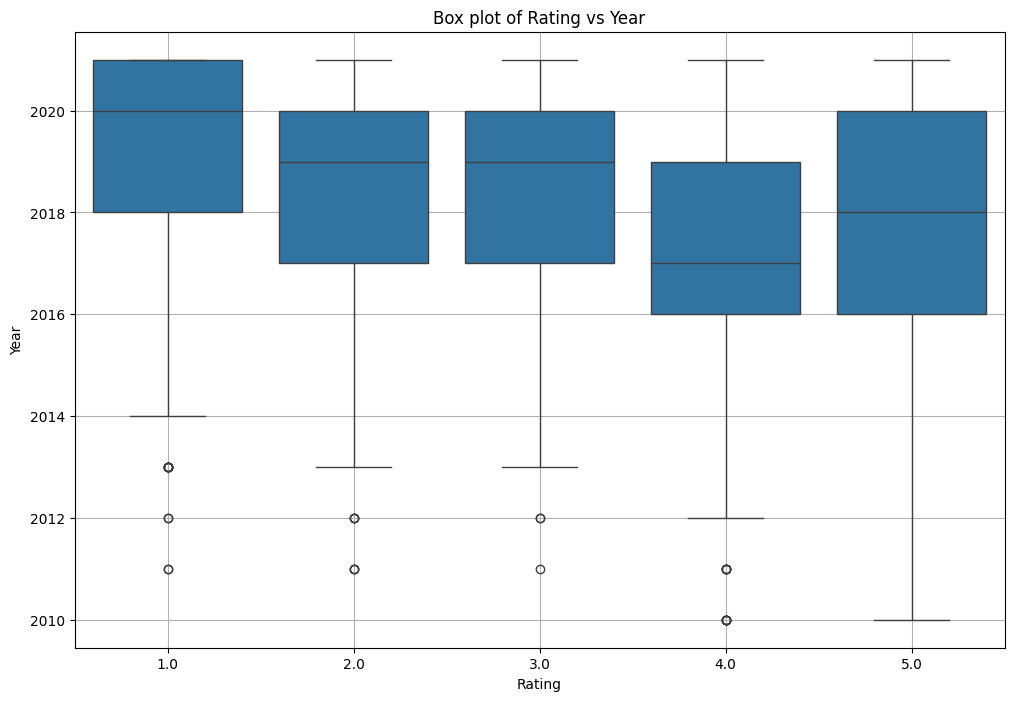

In [8]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='rating', y='year', data=df)
plt.xlabel('Rating')
plt.ylabel('Year')
plt.title('Box plot of Rating vs Year')
plt.grid(True)
plt.show()

As We can see the ratings of all levels are usually concentrated in the most recent years, from around 2016 and 2020. Which may indicate an increase in reviews recently, or even a higher activity by the users. It is possible to see some outliers in earlier years compared to higher ratings.  Suggesting usually the older reviews were reviewed poorly. And there is a consistent median in 2018, and more users rating 1.0 around 2020.

*Removing duplicate rows*

In [9]:
df.drop_duplicates(inplace=True)

**Calculating Polarity**

In [10]:
df['Polarity_Rating'] = df['rating'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [11]:
df.head()

,review_date,handle,rating,review,year,Polarity_Rating
0,2018-04-14,The Dolphin,2.0,Delightful coffee maker if you’re only looking...,2018,Negative
1,2019-02-07,Karen Kaffenberger,1.0,UPDATE: Bought this 10-21-18 and I finally ret...,2019,Negative
2,2017-12-23,C1C3C11,4.0,The big reason I ordered this was because I wa...,2017,Positive
3,2016-11-26,Paul Roberts,5.0,I've owned several of their older brewstation ...,2016,Positive
4,2017-11-28,JennyD,3.0,I agonized over which coffee maker to purchase...,2017,Neutral


**Ploting Rating Visualisation Graph**

C:\Users\kcfke\AppData\Local\Temp\ipykernel_17376\984776944.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating',data=df, palette='winter')


<Axes: xlabel='rating', ylabel='count'>

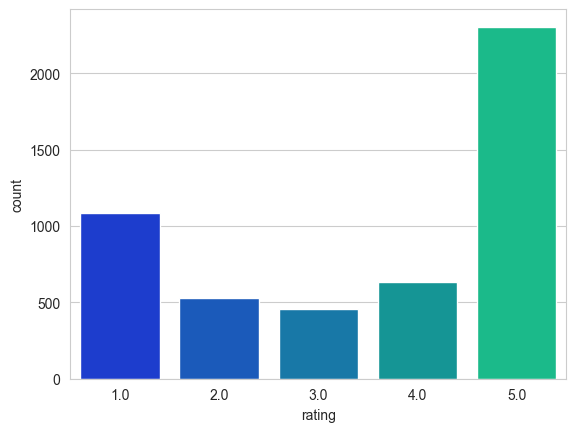

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='rating',data=df, palette='winter')

Twice as many users gave a 1.0 compared to those who gave a 5.0, which, analysing the previous graph, it shows that lately the users are becoming dissatisfied with the choosen Coffee Maker.

**Plotting Polarity Rating Count**

C:\Users\kcfke\AppData\Local\Temp\ipykernel_17376\1376702.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Polarity_Rating',data=df, palette='spring')


<Axes: xlabel='Polarity_Rating', ylabel='count'>

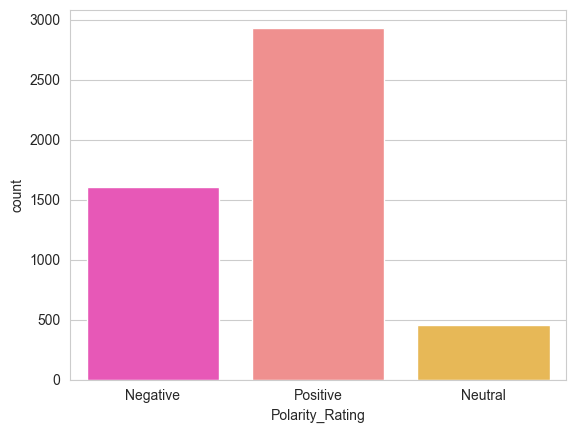

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Polarity_Rating',data=df, palette='spring')

And here we can see that users are generally more inclined to express strong opinions even if negative, once this distribution shows the marjority reviews are positive, followed by the negative reviews, then a smaller proportion of neutral.
If I was selling those Coffee makers, I would go through all negative feedbacks to check which area could be improved.

**Data Preprocessing**

In [16]:
df_Positive = df[df['Polarity_Rating'] == 'Positive'][0:8000]
df_Neutral = df[df['Polarity_Rating'] == 'Neutral']
df_Negative = df[df['Polarity_Rating'] == 'Negative']

**Sample negative and neutral polarity & Creating final dataframe**

In [17]:
df_Neutral_over = df_Neutral.sample(8000, replace=True)
df_Negative_over = df_Negative.sample(8000, replace=True)
df = pd.concat([df_Positive, df_Neutral_over, df_Negative_over], axis=0)

**Text Preprocessing**

In [19]:
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

**Appling the method "get_text_processing" into column review**

In [20]:
df['review'] = df['review'].apply(get_text_processing)
df.head()

,review_date,handle,rating,review,year,Polarity_Rating
2,2017-12-23,C1C3C11,4.0,big reason ordered tired dealing coffee carafe...,2017,Positive
3,2016-11-26,Paul Roberts,5.0,Ive owned several older brewstation models las...,2016,Positive
6,2018-04-19,Kris K.,5.0,second Brewstation first one lasted 11 years e...,2018,Positive
10,2016-10-15,Brian Colon,5.0,Let start saying owned previous model Brew Sta...,2016,Positive
12,2018-07-25,L. L.,4.0,Ive purchased every brand 30 years like one be...,2018,Positive


**Visualising Text Review with Polarity Rating**

In [21]:
df = df[['review', 'Polarity_Rating']]
df.head()

,review,Polarity_Rating
2,big reason ordered tired dealing coffee carafe...,Positive
3,Ive owned several older brewstation models las...,Positive
6,second Brewstation first one lasted 11 years e...,Positive
10,Let start saying owned previous model Brew Sta...,Positive
12,Ive purchased every brand 30 years like one be...,Positive


In [22]:
df.shape

(18935, 2)

Apply One hot encoding on negative, neutral, and positive

In [23]:
one_hot = pd.get_dummies(df["Polarity_Rating"])
df.drop(['Polarity_Rating'],axis=1,inplace=True)
df = pd.concat([df,one_hot],axis=1)
df.head()

,review,Negative,Neutral,Positive
2,big reason ordered tired dealing coffee carafe...,False,False,True
3,Ive owned several older brewstation models las...,False,False,True
6,second Brewstation first one lasted 11 years e...,False,False,True
10,Let start saying owned previous model Brew Sta...,False,False,True
12,Ive purchased every brand 30 years like one be...,False,False,True


**Appling Train Test Split**

In [25]:
X = df['review'].values
y = df.drop('review', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

**Appling vectorization**

In [26]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

**Appling frequency, inverse document frequency:**

In [27]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

**Adding different layers**

In [28]:
model = Sequential()

model.add(Dense(units=12673,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=4000,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

**Fitting the Model**

In [29]:
model.fit(x=X_train, y=y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 216s 4s/step - accuracy: 0.6703 - loss: 0.6658 - val_accuracy: 0.9806 - val_loss: 0.0660
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 157s 3s/step - accuracy: 0.9921 - loss: 0.0311 - val_accuracy: 0.9857 - val_loss: 0.0526
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 158s 3s/step - accuracy: 0.9979 - loss: 0.0075 - val_accuracy: 0.9864 - val_loss: 0.0522
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.9982 - loss: 0.0055 - val_accuracy: 0.9882 - val_loss: 0.0517
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 153s 3s/step - accuracy: 0.9988 - loss: 0.0029 - val_accuracy: 0.9842 - val_loss: 0.0731
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.9980 - loss: 0.0039 - val_accuracy: 0.9817 - val_loss: 0.0938
Epoch 6: early stopping


**Evaluating of Model**

In [32]:
model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', model_score[1])

89/89 ━━━━━━━━━━━━━━━━━━━━ 13s 147ms/step - accuracy: 0.9834 - loss: 0.0815
Test accuracy: 0.9816933870315552


**Prediction**

In [33]:
preds = model.predict(X_test)
preds

178/178 ━━━━━━━━━━━━━━━━━━━━ 20s 111ms/step


array([[4.2056356e-05, 1.7224898e-05, 9.9994063e-01],
       [1.3320416e-06, 9.9998891e-01, 9.7000238e-06],
       [6.8526464e-07, 5.8057628e-07, 9.9999869e-01],
       ...,
       [9.9999940e-01, 2.8143720e-07, 4.1429072e-07],
       [7.3260691e-09, 1.0000000e+00, 1.2956295e-08],
       [2.0273203e-06, 2.3332489e-06, 9.9999559e-01]], dtype=float32)

In [34]:
preds.shape

(5681, 3)